In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import requests
import io
url = r"https://github.com/IBM-EPBL/IBM-Project-51631-1660981089/blob/main/Data%20Collection/DataSet1986-2018.xlsx?raw=true"
download = requests.get(url).content
data = pd.read_excel(url,index_col=0,parse_dates=[0])
print(data.head())

            Closing Value
Date                     
1986-01-02          25.56
1986-01-03          26.00
1986-01-06          26.53
1986-01-07          25.85
1986-01-08          25.87


In [3]:
data.isnull().any()
data.isnull().sum()
data.dropna(axis = 0, inplace = True)
data.isnull().sum()
data_oil = data.reset_index()['Closing Value']
data_oil

0       25.56
1       26.00
2       26.53
3       25.85
4       25.87
        ...  
8211    73.89
8212    74.19
8213    73.05
8214    73.78
8215    73.93
Name: Closing Value, Length: 8216, dtype: float64

In [4]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler (feature_range=(0,1))
data_oil=scaler.fit_transform(np.array(data_oil).reshape(-1,1))

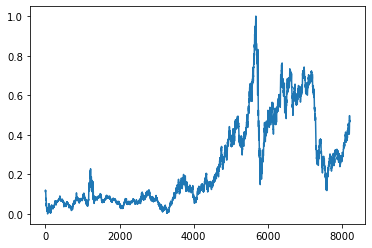

In [5]:
plt.plot(data_oil)

In [6]:
training_size=int(len(data_oil)*0.65)
test_size=len(data_oil)-training_size
train_data, test_data=data_oil[0:training_size,:],data_oil[training_size:len(data_oil),:1]
training_size,test_size
train_data.shape

(5340, 1)

In [7]:
def create_dataset(dataset, time_step=1): 
  dataX, dataY = [], [] 
  for i in range(len(dataset)-time_step-1):
    a = dataset[i:(i+time_step), 0]
    dataX.append(a)
    dataY.append(dataset[i + time_step, 0])
  return np.array(dataX), np.array(dataY)
  
time_step = 10
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)
print(X_train.shape), print(y_train.shape)
print(X_test.shape), print(ytest.shape)
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1],1)
X_test= X_test.reshape(X_test.shape[0],X_test.shape[1],1)

(5329, 10)
(5329,)
(2865, 10)
(2865,)


In [8]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [9]:
model = Sequential()

In [10]:
model.add(LSTM(50,return_sequences=True,input_shape=(10,1)))
model.add(LSTM(50, return_sequences=True))
model.add(LSTM(50))

In [11]:
model.add(Dense (1))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 10, 50)            10400     
                                                                 
 lstm_1 (LSTM)               (None, 10, 50)            20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [12]:
model.compile(loss= 'mean_squared_error', optimizer='adam')

In [13]:
model.fit(X_train,y_train,validation_data=(X_test,ytest), epochs=50,batch_size=64, verbose = 1)

Epoch 1/50
84/84 [==============================] - 7s 34ms/step - loss: 0.0017 - val_loss: 8.7004e-04
Epoch 2/50
84/84 [==============================] - 2s 20ms/step - loss: 1.3388e-04 - val_loss: 8.0664e-04
Epoch 3/50
84/84 [==============================] - 2s 23ms/step - loss: 1.2835e-04 - val_loss: 0.0010
Epoch 4/50
84/84 [==============================] - 2s 22ms/step - loss: 1.3697e-04 - val_loss: 0.0014
Epoch 5/50
84/84 [==============================] - 2s 24ms/step - loss: 1.3293e-04 - val_loss: 0.0010
Epoch 6/50
84/84 [==============================] - 2s 24ms/step - loss: 1.3109e-04 - val_loss: 8.0794e-04
Epoch 7/50
84/84 [==============================] - 2s 23ms/step - loss: 1.1960e-04 - val_loss: 0.0013
Epoch 8/50
84/84 [==============================] - 2s 23ms/step - loss: 1.2488e-04 - val_loss: 7.4985e-04
Epoch 9/50
84/84 [==============================] - 2s 23ms/step - loss: 1.1545e-04 - val_loss: 0.0014
Epoch 10/50
84/84 [==============================] - 2s 22ms/

In [14]:
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)

import math 
from sklearn.metrics import mean_squared_error 
math.sqrt(mean_squared_error(y_train,train_predict))

29.19907846981903

In [15]:
from tensorflow.keras.models import load_model
model.save("crude_oil.h5")

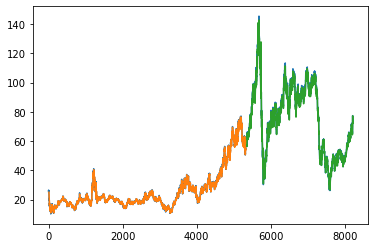

[0.46781552]
11
1 day input [0.4811195  0.49726048 0.46794017 0.47297497 0.47119799 0.47341922
 0.46497853 0.47038353 0.47149415 0.46781552]
1 day output [[0.4640985]]
2 day input [0.49726048 0.46794017 0.47297497 0.47119799 0.47341922 0.46497853
 0.47038353 0.47149415 0.46781552 0.46409851]
2 day output [[0.4595859]]
3 day input [0.46794017 0.47297497 0.47119799 0.47341922 0.46497853 0.47038353
 0.47149415 0.46781552 0.46409851 0.45958591]
3 day output [[0.4545909]]
4 day input [0.47297497 0.47119799 0.47341922 0.46497853 0.47038353 0.47149415
 0.46781552 0.46409851 0.45958591 0.45459089]
4 day output [[0.44985232]]
5 day input [0.47119799 0.47341922 0.46497853 0.47038353 0.47149415 0.46781552
 0.46409851 0.45958591 0.45459089 0.44985232]
5 day output [[0.445487]]
6 day input [0.47341922 0.46497853 0.47038353 0.47149415 0.46781552 0.46409851
 0.45958591 0.45459089 0.44985232 0.44548699]
6 day output [[0.44162288]]
7 day input [0.46497853 0.47038353 0.47149415 0.46781552 0.46409851 0.4

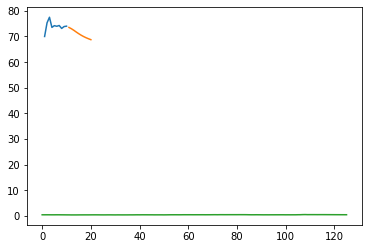

In [16]:
look_back=10
trainpredictPlot = np.empty_like(data_oil)
trainpredictPlot[:, :] = np.nan
trainpredictPlot[look_back:len(train_predict)+look_back, :] = train_predict

testPredictPlot = np.empty_like(data_oil)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(data_oil)-1, :] = test_predict

plt.plot(scaler.inverse_transform(data_oil))
plt.plot(trainpredictPlot)
plt.plot(testPredictPlot)
plt.show()

len(test_data)
x_input=test_data[2866:].reshape(1,-1)
x_input.shape
temp_input=list(x_input)
temp_input=temp_input[0].tolist()
temp_input

lst_output=[]
n_steps=10
i=0
while(i<10):
  if(len(temp_input)>10):

    x_input=np.array(temp_input[1:]) 
    print("{} day input {}".format(i,x_input))
    x_input=x_input.reshape(1,-1)
    x_input = x_input.reshape((1, n_steps, 1))

    yhat = model.predict(x_input, verbose=0)
    print("{} day output {}".format(i,yhat))
    temp_input.extend(yhat[0].tolist())
    temp_input=temp_input[1:] #print(temp_input)
    lst_output.extend(yhat.tolist())
    i=i+1
  else:
    x_input = x_input.reshape((1, n_steps,1))
    yhat = model.predict(x_input, verbose=0) 
    print(yhat[0]) 
    temp_input.extend(yhat[0].tolist()) 
    print(len(temp_input)) 
    lst_output.extend(yhat.tolist()) 
    i=i+1

day_new=np.arange(1,11)
day_pred=np.arange(11,21)
len(data_oil)

plt.plot(day_new, scaler.inverse_transform(data_oil[8206:]))
plt.plot(day_pred, scaler.inverse_transform(lst_output))

df3=data_oil.tolist()
df3.extend(lst_output)
plt.plot(df3[8100:])

df3=scaler.inverse_transform(df3).tolist()